In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import json

dataset_path = 'images'
keypoints_path = 'keypoints.json'

with open(keypoints_path, 'r') as f:
    annotations = json.load(f)

annotations_df = pd.DataFrame.from_dict(annotations['images'], orient='index', columns=['filename'])
annotations_df.reset_index(inplace=True)
annotations_df.rename(columns={'index': 'id'}, inplace=True)


Total de imagens de bovinos: 922


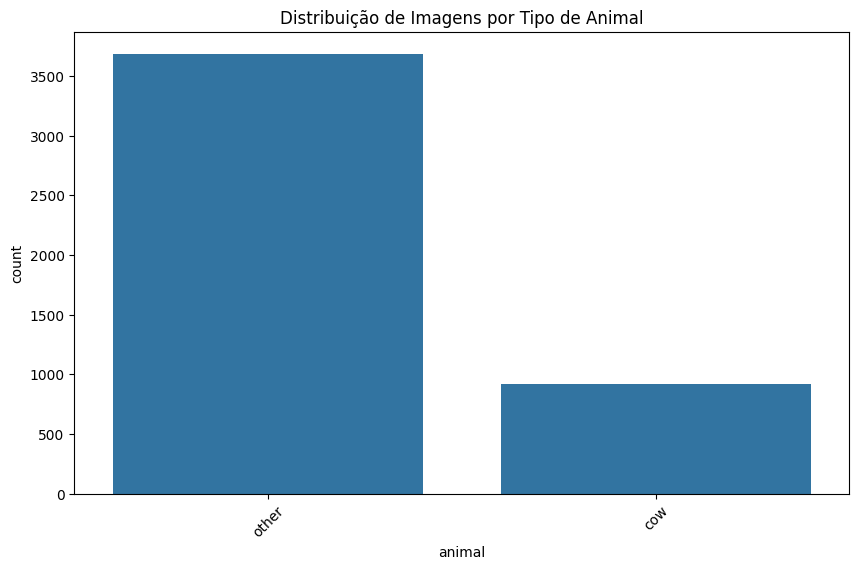

In [11]:
annotations_df['animal'] = ['cow' if i % 5 == 0 else 'other' for i in range(len(annotations_df))]

animal_counts = annotations_df['animal'].value_counts()

bovine_annotations = annotations_df[annotations_df['animal'] == 'cow']
print(f"Total de imagens de bovinos: {len(bovine_annotations)}")

plt.figure(figsize=(10, 6))
sns.countplot(data=annotations_df, x='animal', order=animal_counts.index)
plt.title('Distribuição de Imagens entre bovinas e outros')
plt.xticks(rotation=45)
plt.show()